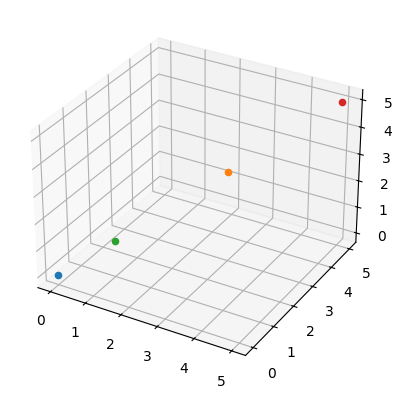


Расстояние Евклида
5.196152422706632
3.4641016151377544
6.928203230275509
8.660254037844387

Расстояние Чебышева
3.0
2.0
4.0
5.0

Расстояние Хемминга
9.0
6.0
12.0
15.0


In [5]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(0, 0, 0)
ax.scatter(3, 3, 3)
ax.scatter(1, 1, 1)
ax.scatter(5, 5, 5)
plt.show()

point1 = np.array((0, 0, 0))
point2 = np.array((3, 3, 3))
point3 = np.array((1, 1, 1))
point4 = np.array((5, 5, 5))

print('\nРасстояние Евклида')
print(np.linalg.norm(point1-point2))
print(np.linalg.norm(point2-point3))
print(np.linalg.norm(point3-point4))
print(np.linalg.norm(point1-point4))

print('\nРасстояние Чебышева')
print(np.linalg.norm(point1-point2, ord=np.inf))
print(np.linalg.norm(point2-point3, ord=np.inf))
print(np.linalg.norm(point3-point4, ord=np.inf))
print(np.linalg.norm(point1-point4, ord=np.inf))

print('\nРасстояние Хемминга')
print(np.linalg.norm(point1-point2, ord=1))
print(np.linalg.norm(point2-point3, ord=1))
print(np.linalg.norm(point3-point4, ord=1))
print(np.linalg.norm(point1-point4, ord=1))

In [6]:
Z = np.zeros((5, 5))
Z += np.arange(5)
print(Z)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


In [10]:
from sklearn.feature_extraction import DictVectorizer


characteristics = [
    {"цвет глаз": 4, "вес": 1},
    {"цвет кожи": 3, "цвет волос": 9},
    {"размер стопы": 6, "обхват живота": 6},
    {"пол": 5, "рост": 2}
]

dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(characteristics)
features

array([[1., 0., 0., 0., 0., 0., 4., 0.],
       [0., 0., 0., 0., 0., 9., 0., 3.],
       [0., 6., 0., 6., 0., 0., 0., 0.],
       [0., 0., 5., 0., 2., 0., 0., 0.]])